In [81]:
# Load libraries
import pandas as pd
import seaborn as sns #for visulaization of data
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB # Import GaussianClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module foranalysis

In [82]:
#make sure you have your labels correct
#some files have this in the file - others it is in the description
#if it is in the file you can copy them here then delete that line in the file
col_names = ['pregnancies', 'glucose', 'blood_pressure',
'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function',
'age', 'outcome']
# load dataset
data = pd.read_csv("diabetes.csv", header=None, names=col_names)
#take a peek to see if this looks right
data.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [83]:
data.shape

(768, 9)

In [84]:
data.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [85]:
data.outcome.unique()

array([1, 0])

In [86]:
data.dtypes

pregnancies                     int64
glucose                         int64
blood_pressure                  int64
skin_thickness                  int64
insulin                         int64
bmi                           float64
diabetes_pedigree_function    float64
age                             int64
outcome                         int64
dtype: object

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 768 non-null    int64  
 1   glucose                     768 non-null    int64  
 2   blood_pressure              768 non-null    int64  
 3   skin_thickness              768 non-null    int64  
 4   insulin                     768 non-null    int64  
 5   bmi                         768 non-null    float64
 6   diabetes_pedigree_function  768 non-null    float64
 7   age                         768 non-null    int64  
 8   outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [88]:
data.describe(percentiles=[.25,0.5,0.75,0.90,0.95])

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
90%,9.000000,167.000000,88.000000,40.000000,210.000000,41.500000,0.878600,51.000000,1.000000
95%,10.000000,181.000000,90.000000,44.000000,293.000000,44.395000,1.132850,58.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [89]:
((data.pregnancies == 0).sum(),(data.glucose==0).sum(),(data.blood_pressure==0).sum(),
(data.skin_thickness==0).sum(),(data.insulin==0).sum(),(data.bmi==0).sum(),
(data.diabetes_pedigree_function==0).sum(),(data.age==0).sum())
## Counting cells with 0 Values for each variable and publishing the counts below

(111, 5, 35, 227, 374, 11, 0, 0)

In [90]:
drop_Glu=data.index[data.glucose == 0].tolist()
drop_BP=data.index[data.blood_pressure == 0].tolist()
drop_Skin = data.index[data.skin_thickness==0].tolist()
drop_Ins = data.index[data.insulin==0].tolist()
drop_BMI = data.index[data.bmi==0].tolist()
c=drop_Glu+drop_BP+drop_Skin+drop_Ins+drop_BMI
dia=data.drop(data.index[c])
dia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 392 non-null    int64  
 1   glucose                     392 non-null    int64  
 2   blood_pressure              392 non-null    int64  
 3   skin_thickness              392 non-null    int64  
 4   insulin                     392 non-null    int64  
 5   bmi                         392 non-null    float64
 6   diabetes_pedigree_function  392 non-null    float64
 7   age                         392 non-null    int64  
 8   outcome                     392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


In [91]:
dia.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [92]:
diabetes1 = dia[dia.outcome==1]
diabetes0 = dia[dia.outcome==0]

In [93]:
diabetes0

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
3,1,89,66,23,94,28.1,0.167,21,0
18,1,103,30,38,83,43.3,0.183,33,0
20,3,126,88,41,235,39.3,0.704,27,0
27,1,97,66,15,140,23.2,0.487,22,0
28,13,145,82,19,110,22.2,0.245,57,0
...,...,...,...,...,...,...,...,...,...
747,1,81,74,41,57,46.3,1.096,32,0
751,1,121,78,39,74,39.0,0.261,28,0
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [94]:
diabetes1

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
732,2,174,88,37,120,44.5,0.646,24,1
740,11,120,80,37,150,42.3,0.785,48,1
748,3,187,70,22,200,36.4,0.408,36,1
753,0,181,88,44,510,43.3,0.222,26,1


Text(0.5, 1.0, 'Count Plot for Outcome')

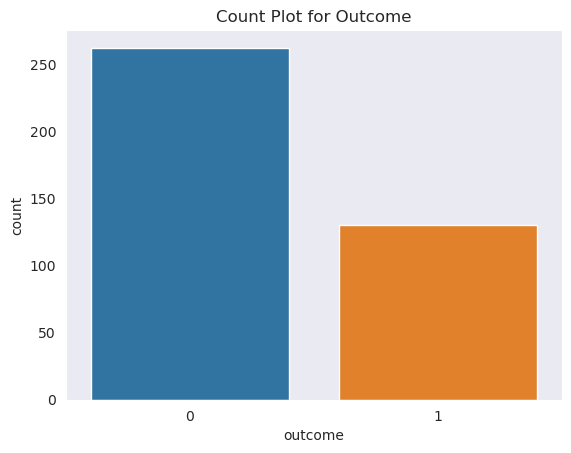

In [95]:
## creating count plot with title using seaborn
sns.countplot(x=dia.outcome)
plt.title("Count Plot for Outcome")

In [96]:
# Computing the %age of diabetic and non-diabetic in the sample
Out0=len(dia[dia.outcome==1])
Out1=len(dia[dia.outcome==0])
Total=Out0+Out1
PC_of_1 = Out1*100/Total
PC_of_0 = Out0*100/Total
PC_of_1, PC_of_0
#this report the percent of 1's who are diabetic and the 0's who are not in the data

(66.83673469387755, 33.16326530612245)

Text(0.5, 1.0, 'Boxplot for Preg by Outcome')

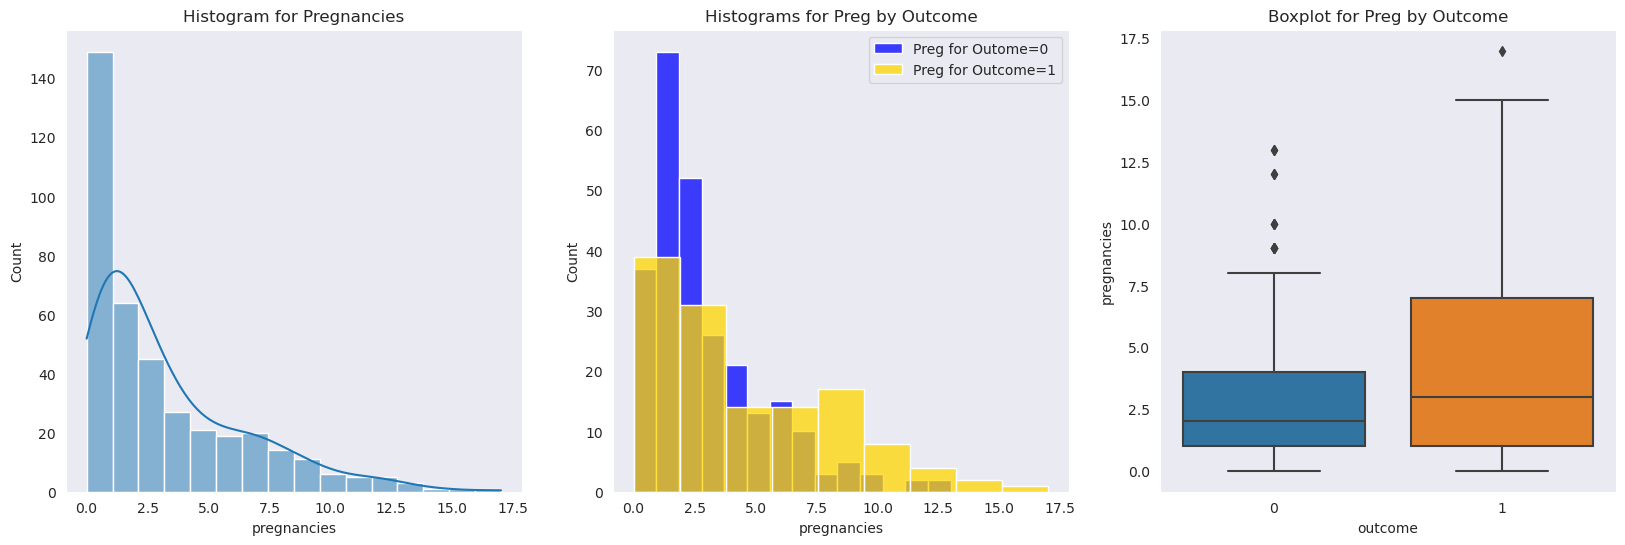

In [97]:
## Creating 3 subplots - 1st for histogram, 2nd for histogram segmented by Outcome and 3rd for representing same segmentation using boxplot
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Pregnancies")
sns.histplot(dia.pregnancies,kde=True)
plt.subplot(1,3,2)
sns.histplot(diabetes0.pregnancies,kde=False,color="Blue", label="Preg for Outome=0")
sns.histplot(diabetes1.pregnancies,kde=False,color = "Gold", label ="Preg for Outcome=1")
plt.title("Histograms for Preg by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=dia.outcome,y=dia.pregnancies)
plt.title("Boxplot for Preg by Outcome")

Text(0.5, 1.0, 'Boxplot for Glucose by Outcome')

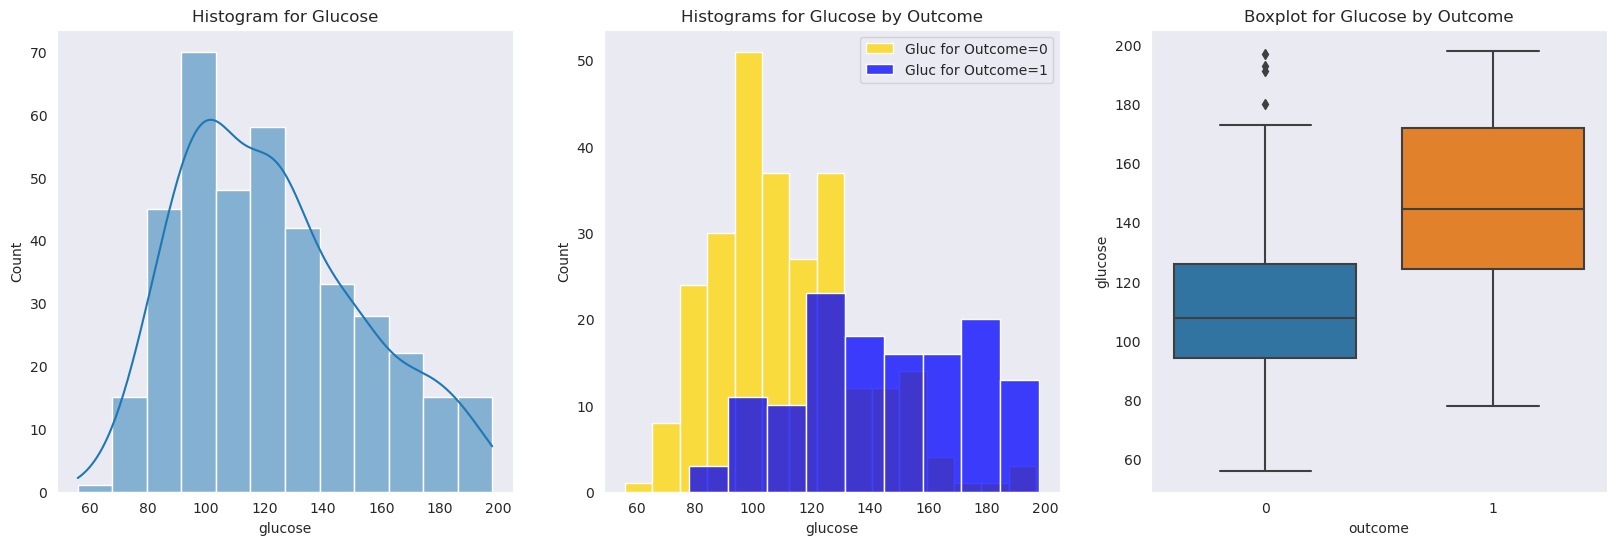

In [98]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.title("Histogram for Glucose")
sns.histplot(dia.glucose, kde=True)
plt.subplot(1,3,2)
sns.histplot(diabetes0.glucose,kde=False,color="Gold", label="Gluc for Outcome=0")
sns.histplot(diabetes1.glucose, kde=False, color="Blue", label = "Gluc for Outcome=1")
plt.title("Histograms for Glucose by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=dia.outcome,y=dia.glucose)
plt.title("Boxplot for Glucose by Outcome")

Text(0.5, 1.0, 'Boxplot for Blood Pressure by Outcome')

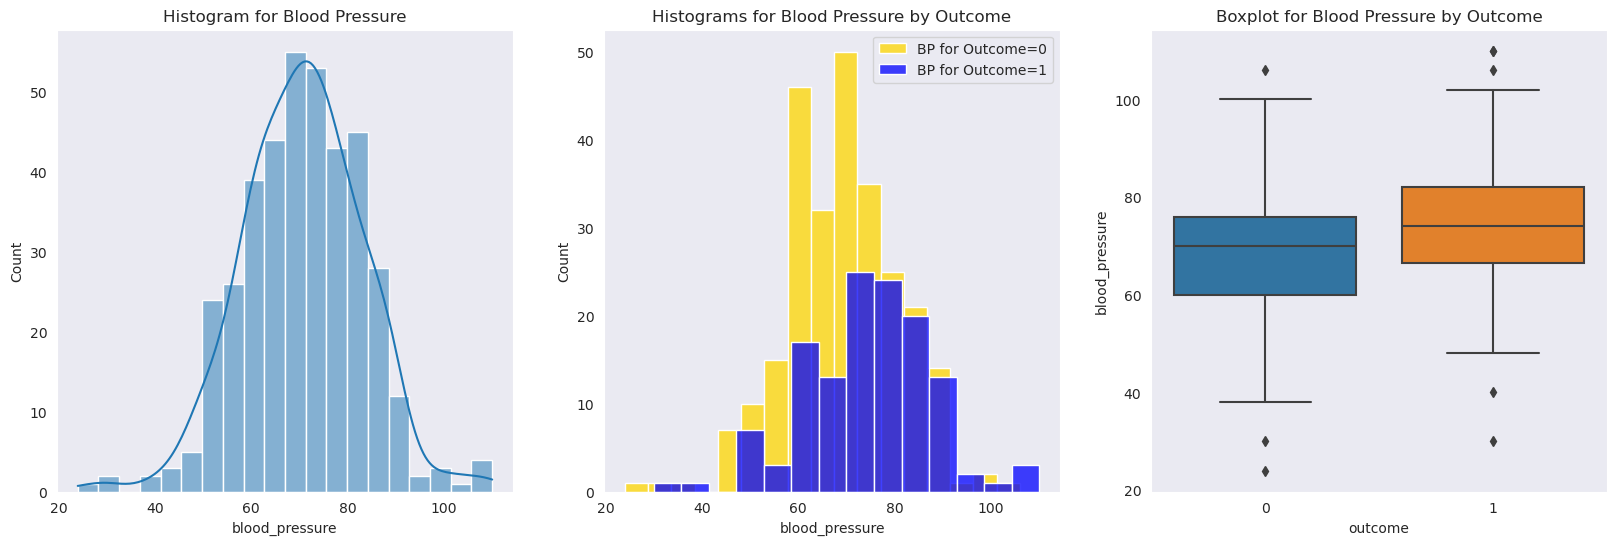

In [99]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.title("Histogram for Blood Pressure")
sns.histplot(dia.blood_pressure, kde=True)
plt.subplot(1,3,2)
sns.histplot(diabetes0.blood_pressure,kde=False,color="Gold",
label="BP for Outcome=0")
sns.histplot(diabetes1.blood_pressure, kde=False, color="Blue", label= "BP for Outcome=1")
plt.title("Histograms for Blood Pressure by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=dia.outcome,y=dia.blood_pressure)
plt.title("Boxplot for Blood Pressure by Outcome")

Text(0.5, 1.0, 'Boxplot for Skin Thickness by Outcome')

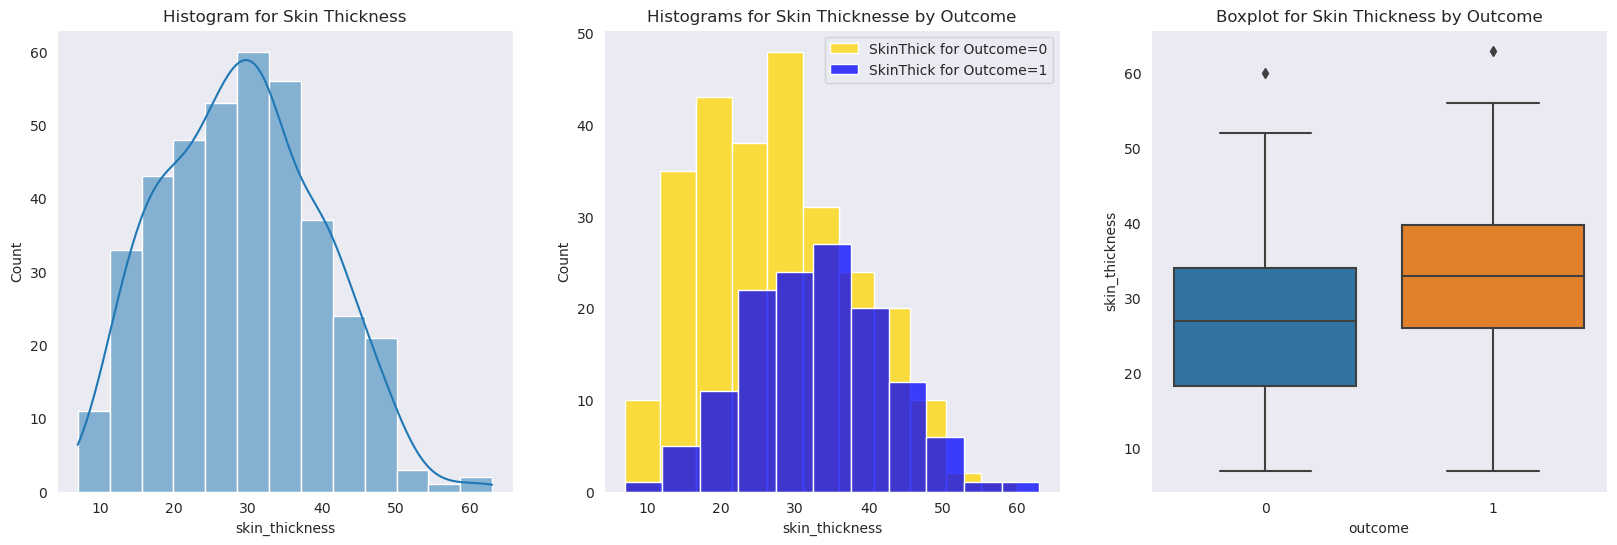

In [100]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.title("Histogram for Skin Thickness")
sns.histplot(dia.skin_thickness, kde=True)
plt.subplot(1,3,2)
sns.histplot(diabetes0.skin_thickness,kde=False,color="Gold",
label="SkinThick for Outcome=0")
sns.histplot(diabetes1.skin_thickness, kde=False, color="Blue", label= "SkinThick for Outcome=1")
plt.title("Histograms for Skin Thicknesse by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=dia.outcome,y=dia.skin_thickness)
plt.title("Boxplot for Skin Thickness by Outcome")

Text(0.5, 1.0, 'Boxplot for Insulin by Outcome')

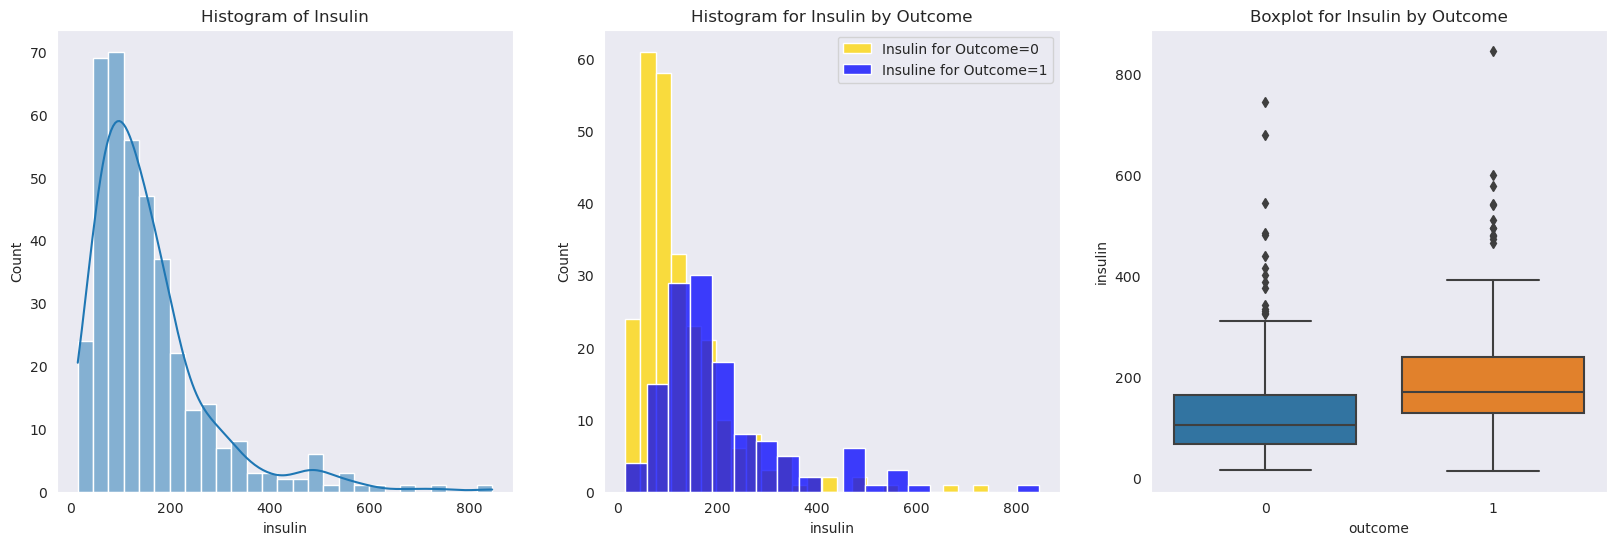

In [101]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.histplot(dia.insulin,kde=True)
plt.title("Histogram of Insulin")
plt.subplot(1,3,2)
sns.histplot(diabetes0.insulin,kde=False, color="Gold", label="Insulin for Outcome=0")
sns.histplot(diabetes1.insulin,kde=False, color="Blue", label="Insuline for Outcome=1")
plt.title("Histogram for Insulin by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=dia.outcome, y=dia.insulin)
plt.title("Boxplot for Insulin by Outcome")

Text(0.5, 1.0, 'Boxplot for BMI by Outcome')

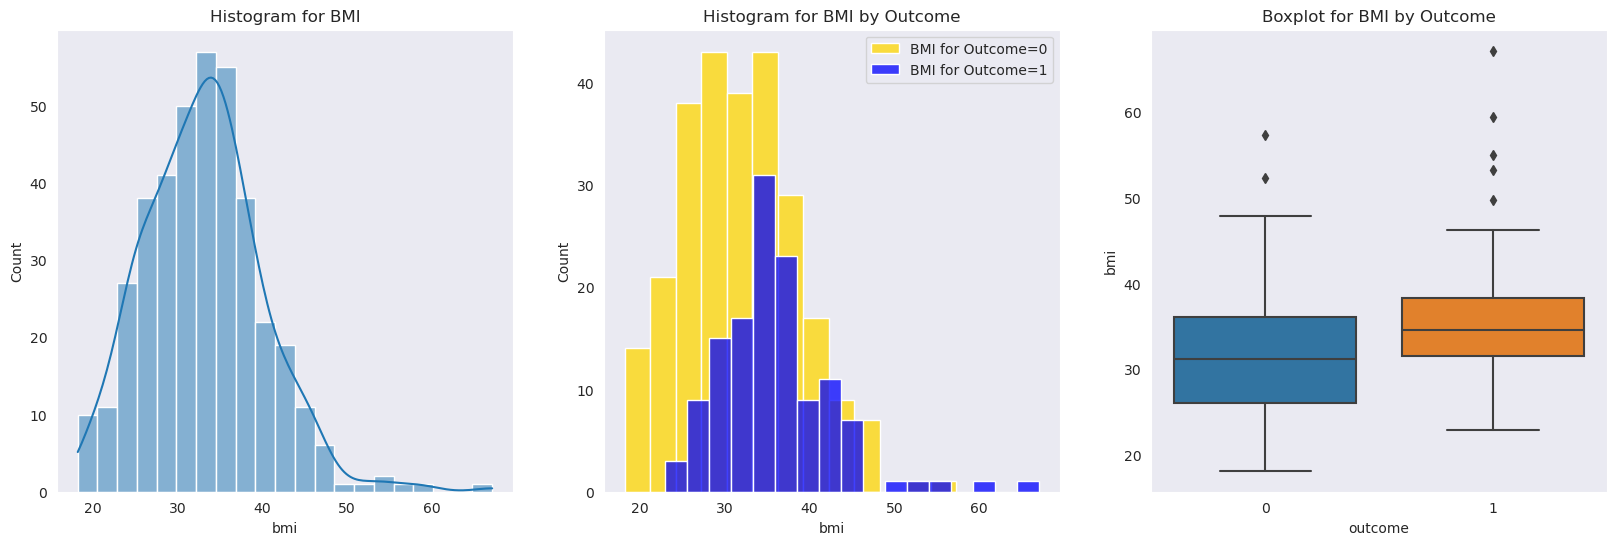

In [102]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.histplot(dia.bmi, kde=True)
plt.title("Histogram for BMI")
plt.subplot(1,3,2)
sns.histplot(diabetes0.bmi, kde=False,color="Gold", label="BMI for Outcome=0")
sns.histplot(diabetes1.bmi, kde=False, color="Blue", label="BMI for Outcome=1")
plt.legend()
plt.title("Histogram for BMI by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=dia.outcome, y=dia.bmi)
plt.title("Boxplot for BMI by Outcome")

Text(0.5, 1.0, 'Boxplot for DiabetesPedigreeFunction by Outcome')

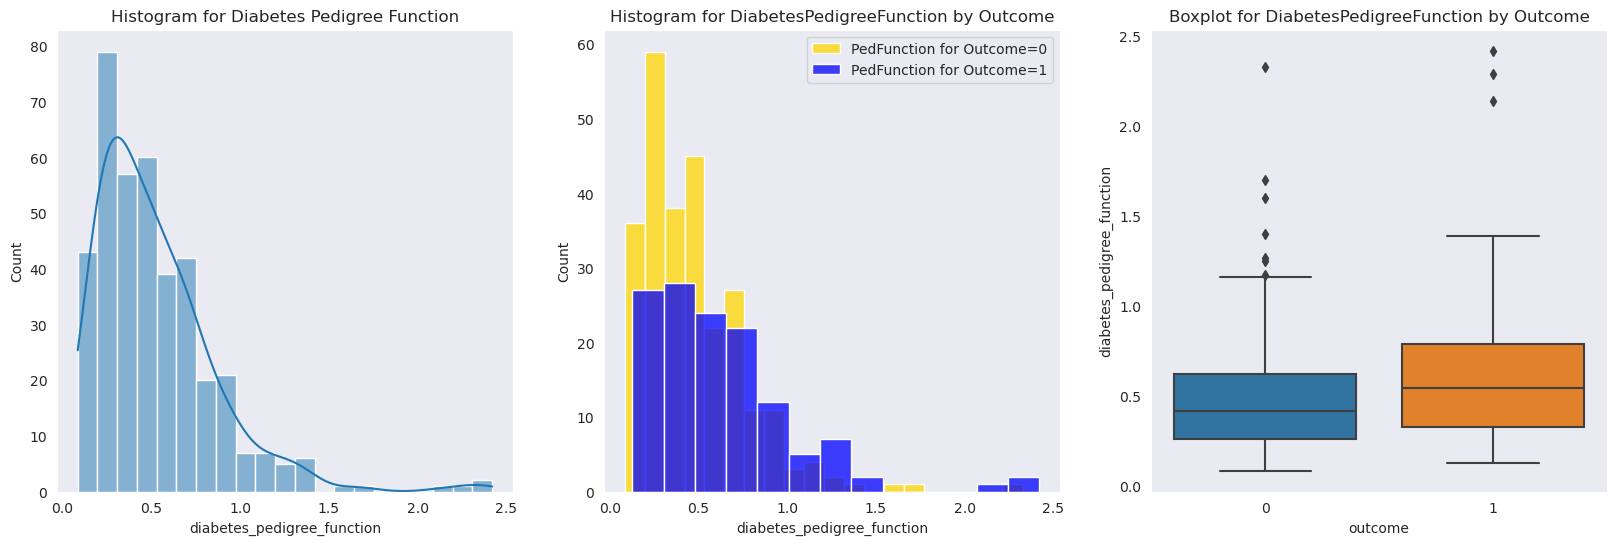

In [103]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.histplot(dia.diabetes_pedigree_function,kde=True)
plt.title("Histogram for Diabetes Pedigree Function")
plt.subplot(1,3,2)
sns.histplot(diabetes0.diabetes_pedigree_function, kde=False, color="Gold",
label="PedFunction for Outcome=0")
sns.histplot(diabetes1.diabetes_pedigree_function, kde=False, color="Blue",
label="PedFunction for Outcome=1")
plt.legend()
plt.title("Histogram for DiabetesPedigreeFunction by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=dia.outcome, y=dia.diabetes_pedigree_function)
plt.title("Boxplot for DiabetesPedigreeFunction by Outcome")

Text(0.5, 1.0, 'Boxplot for Age by Outcome')

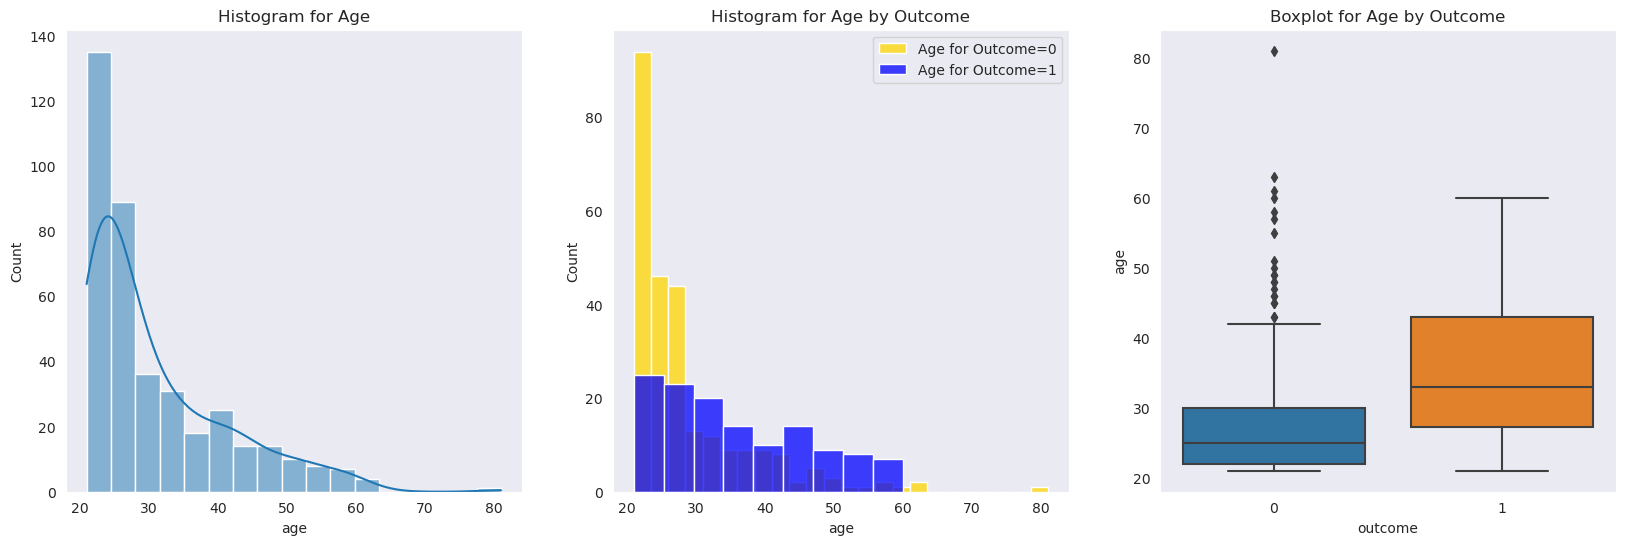

In [104]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.histplot(dia.age,kde=True)
plt.title("Histogram for Age")
plt.subplot(1,3,2)
sns.histplot(diabetes0.age,kde=False,color="Gold", label="Age for Outcome=0")
sns.histplot(diabetes1.age,kde=False, color="Blue", label="Age for Outcome=1")
plt.legend()
plt.title("Histogram for Age by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=dia.outcome,y=dia.age)
plt.title("Boxplot for Age by Outcome")

In [105]:
#split dataset in features and target variable
feature_cols = ['pregnancies', 'glucose', 'blood_pressure',
'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function',
'age']
X = dia[feature_cols] # Features
y = dia['outcome'] # Target variable

In [106]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=1) # 70% training and 30% test

In [107]:
#Create a Gaussian Classifier
gnb = GaussianNB()
#Train model using the training sets
gnb.fit(X_train, y_train)
#predict the response for test dataset
y_pred = gnb.predict(X_test)

In [108]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.711864406779661


# Answers to Questions 1-4 on page 18: Diabetes

<p>1. The way I interpret this accuracy score is that based on previous data, that it correctly predicted whether a patient had diabetes only 71% of the time after being trained by a small dataset. I don't think that this is a great score for any sort of proper decision-making to really take place.  </p>
<p>2. Partially said in question 1's answer, I don't think that this is a good percentage whatsoever. That means, when a patient comes in to get tested for diabetes, that there is a ~30% chance to get misdiagnosed. If I was a patient, I would want to know that the algorithm is near perfect for a lifestyle changing diagnosis like diabetes. This goes for other types of medical diagnosis in general, which could lead to patients being given the wrong drugs to combat an illness that was misdiagnosed in the first place.  </p>
<p>3. I personally don't think that it will be great in the long-run to use a Bayesian Classification model for something like this. People are different and diabetes could have small differences from person to person, and if an algorithm is simply relying on true/false scenarios of the small portion of data the algorithm is given. I could be wrong, but I feel like there could be a better machine learning method than this to predict if a patient has diabetes.   </p>
<p>4. The big things that I think are affecting this dataset is the size and quality of the data. From the size perspective, we started out with nearly 800 lines of data, but half of that was partial data that needed to be ignore. In a situation like this, the more data that can be gathered, the better the algorithm will be able to predict the outcome. The other part, quality, starts with the bad data being inputted off the bat that we had to ignore, but some of the defining factors, like you mentioned with the BMI, aren't great ways measure how healthy people are. And if we are using data like that, then we can say that our algorithm is using data that could be unrelated towards actually diagnosing a medical condition. So even if there is a trend with some of it on a small scale, it doesn't mean that this trend will continue for all people. The other thing possibly affecting the accuracy is the fact that outcome 0 had nearly 2x the number of data to train and test with than ourcome 1, which means that outcome 0 which is another size issue of this data set.   </p>

In [109]:
# grabbing lines 488, 600, 543, and 313 in csv line 488, 600 outcome = 0 and 543, 313 outcome = 1
test0 = [[0,173,78,32,265,46.5,1.159,58], [1,109,38,18,120,23.1,0.407,26], [10,90,85,32,0,34.9,0.825,56], [2,155,74,17,96,26.6,0.433,27]]
#run test cases through model and see prediction
y_test0 = (gnb.predict(test0))
for i in range (len(test0)):
    print(f"predicted: {y_test0[i]}")

predicted: 1
predicted: 0
predicted: 1
predicted: 0


/opt/anaconda/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [110]:
#from: https://archive.ics.uci.edu/dataset/33/dermatology
#make sure you have your labels correct
#some files have this in the file - others it is in the description
#if it is in the file you can copy them here then delete that line inthe file
col_names = ['erthema', 'scaling', 'definite_borders', 'itching',
'koebner', 'polygonal_paps', 'follicular_paps', 'oral_mucosal',
'knee_elbow', 'scalp','family_history',
'melanin','eosinophils','PNL','fibrosis','exocytosis','acanthosis','hyperkeratosis',
'parakeratosis','clubbing','elongation','thinning','spongiform', 'munro',
'focal','dis_of_gran','damage_of_basal','spongiosis','saw_tooth','horn_plug',
'perifollicular_parakera','inflam_mono_inflit','band-like','age','outcome']
# load dataset
derm = pd.read_csv("dermatology.csv", header=None, names=col_names)
#take a peak to see if this looks right
derm.head()

,erthema,scaling,definite_borders,itching,koebner,polygonal_paps,follicular_paps,oral_mucosal,knee_elbow,scalp,...,dis_of_gran,damage_of_basal,spongiosis,saw_tooth,horn_plug,perifollicular_parakera,inflam_mono_inflit,band-like,age,outcome
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


<Axes: title={'center': 'Count Plot for Outcome'}, xlabel='Outcome', ylabel='count'>

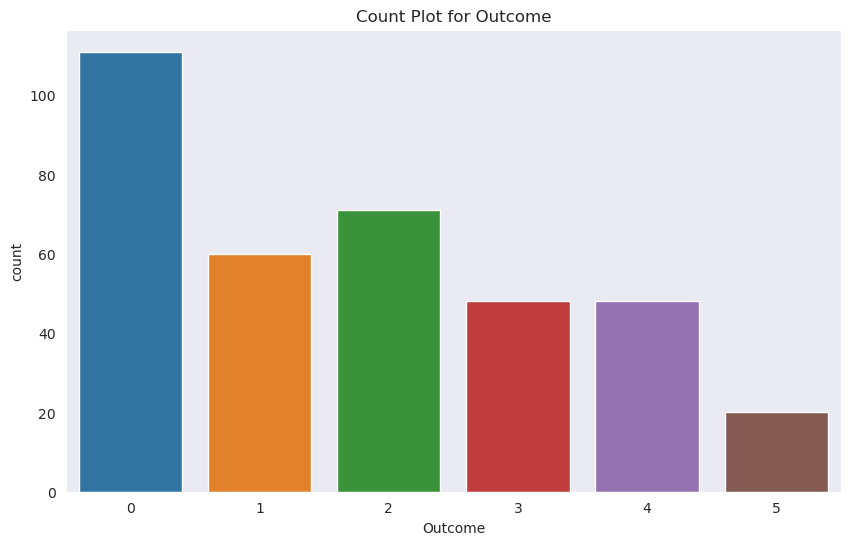

In [111]:
derm1 = derm[derm.outcome==1]
derm2 = derm[derm.outcome==2]
derm3 = derm[derm.outcome==3]
derm4 = derm[derm.outcome==4]
derm5 = derm[derm.outcome==5]
derm6 = derm[derm.outcome==6]

plt.figure(figsize=(10,6))
plt.title("Count Plot for Outcome")
plt.xlabel("Outcome")
sns.countplot(data=[derm1.outcome, derm2.outcome, derm3.outcome, derm4.outcome, derm5.outcome, derm6.outcome])

Text(0.5, 1.0, 'Boxplot for Erthema by Outcome')

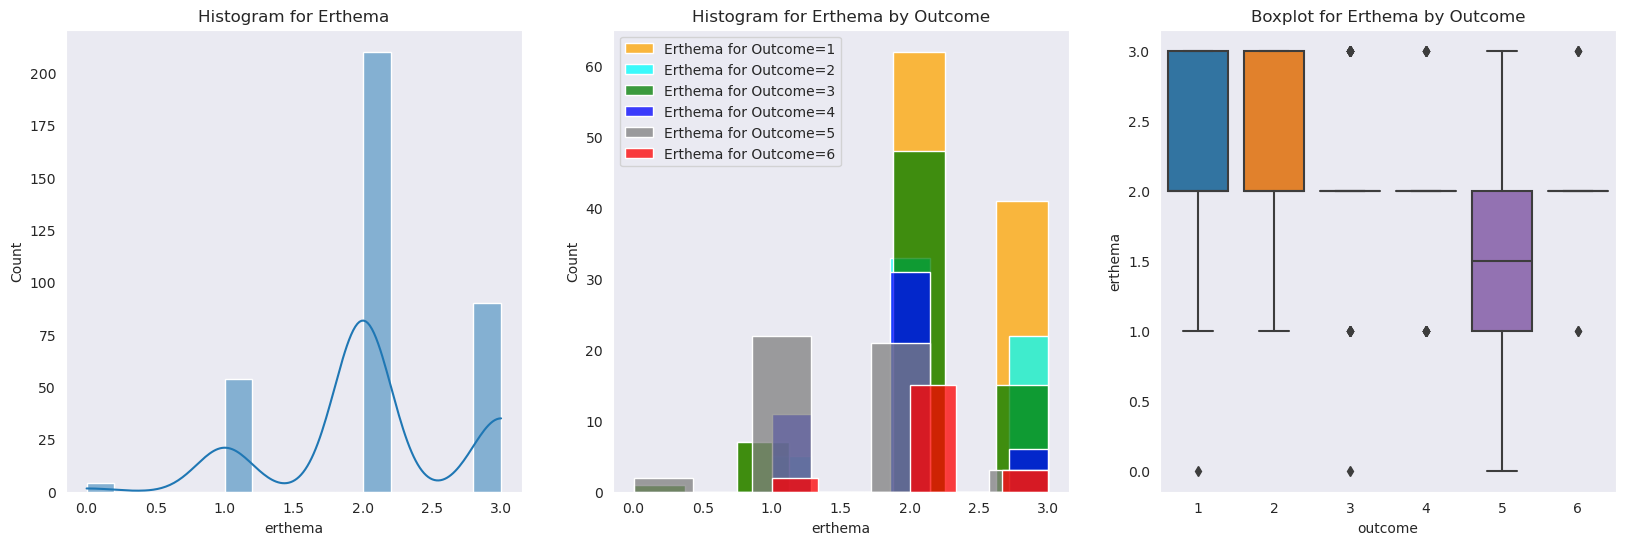

In [112]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.histplot(derm.erthema,kde=True)
plt.title("Histogram for Erthema")
plt.subplot(1,3,2)
sns.histplot(derm1.erthema,kde=False,color="Orange", label="Erthema for Outcome=1")
sns.histplot(derm2.erthema,kde=False,color="Cyan", label="Erthema for Outcome=2")
sns.histplot(derm3.erthema,kde=False,color="Green", label="Erthema for Outcome=3")
sns.histplot(derm4.erthema,kde=False,color="Blue", label="Erthema for Outcome=4")
sns.histplot(derm5.erthema,kde=False,color="Grey", label="Erthema for Outcome=5")
sns.histplot(derm6.erthema,kde=False,color="Red", label="Erthema for Outcome=6")
plt.legend()
plt.title("Histogram for Erthema by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=derm.outcome,y=derm.erthema)
plt.title("Boxplot for Erthema by Outcome")

Text(0.5, 1.0, 'Boxplot for Scaling by Outcome')

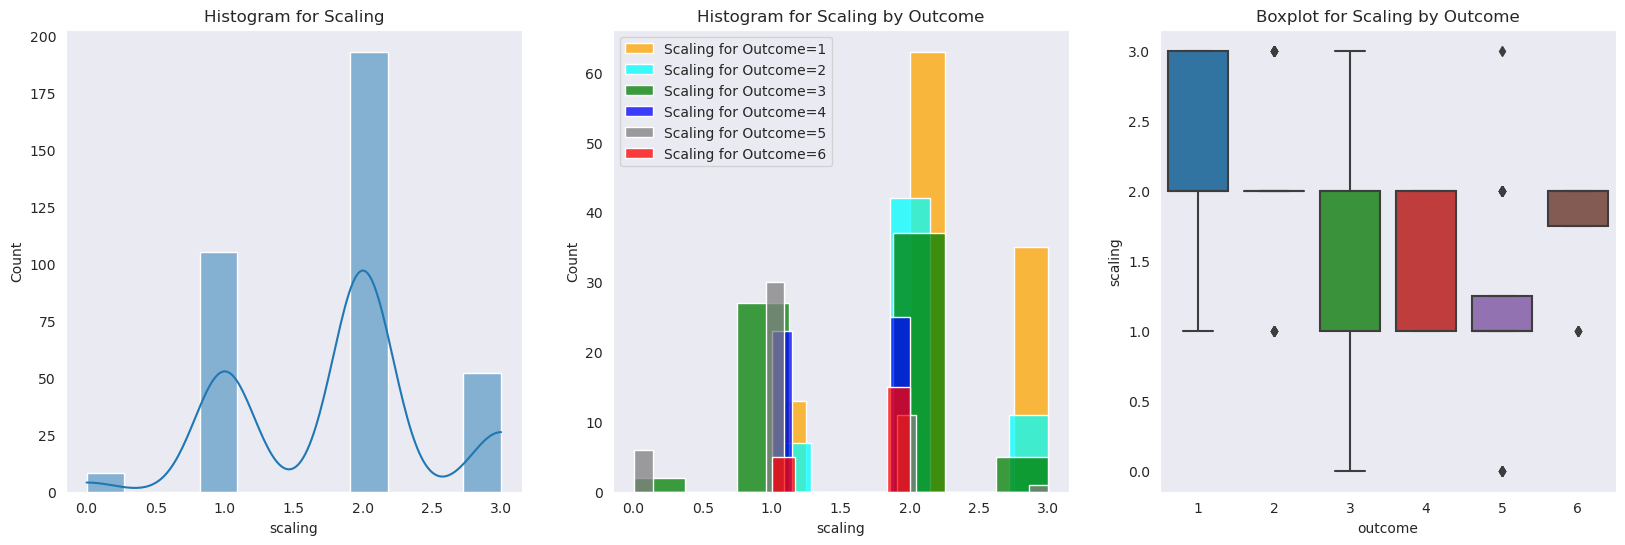

In [113]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.histplot(derm.scaling,kde=True)
plt.title("Histogram for Scaling")
plt.subplot(1,3,2)
sns.histplot(derm1.scaling,kde=False,color="Orange", label="Scaling for Outcome=1")
sns.histplot(derm2.scaling,kde=False,color="Cyan", label="Scaling for Outcome=2")
sns.histplot(derm3.scaling,kde=False,color="Green", label="Scaling for Outcome=3")
sns.histplot(derm4.scaling,kde=False,color="Blue", label="Scaling for Outcome=4")
sns.histplot(derm5.scaling,kde=False,color="Grey", label="Scaling for Outcome=5")
sns.histplot(derm6.scaling,kde=False,color="Red", label="Scaling for Outcome=6")
plt.legend()
plt.title("Histogram for Scaling by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=derm.outcome,y=derm.scaling)
plt.title("Boxplot for Scaling by Outcome")

In [114]:
#Testing with 70/30 split
#split dataset in features and target variable
feature_cols = ['erthema', 'scaling', 'definite_borders', 'itching',
'koebner', 'polygonal_paps', 'follicular_paps', 'oral_mucosal',
'knee_elbow', 'scalp','family_history',
'melanin','eosinophils','PNL','fibrosis','exocytosis','acanthosis','hyperkeratosis',
'parakeratosis','clubbing','elongation','thinning','spongiform', 'munro',
'focal','dis_of_gran','damage_of_basal','spongiosis','saw_tooth','horn_plug',
'perifollicular_parakera','inflam_mono_inflit','band-like','age']
X = derm[feature_cols] # Features
y = derm['outcome'] # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
#Create a Gaussian Classifier
gnbd = GaussianNB()
#Train model using the training sets
gnbd.fit(X_train, y_train)
#predict the response for test dataset
y_pred = gnbd.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9259259259259259


In [115]:
#Testing with 80/20 split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test
#Create a Gaussian Classifier
gnbd2 = GaussianNB()
#Train model using the training sets
gnbd2.fit(X_train, y_train)
#predict the response for test dataset
y_pred = gnbd2.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9583333333333334


In [116]:
#Testing with 85/15 split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1) # 85% training and 15% test
#Create a Gaussian Classifier
gnbd3 = GaussianNB()
#Train model using the training sets
gnbd3.fit(X_train, y_train)
#predict the response for test dataset
y_pred = gnbd3.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9444444444444444


# Answers to Questions 1-4 on page 22: Dermatology

<p>1. The way I interpret this accuracy score is that based on previous data, that it correctly predicted 92.6% of the time which corresponding skin condition a patient had of the 6 diseases/conditions listed in dermatology.names file.  </p>
<p>2. This is definetly much better than the previous one with diabetes. However, in context of medical diagnosis I have already shared my thoughts about overall accurary and being near perfect in the previous response. When a doctor tries to diagnose a condition on a patient, they aren't always correct the first time, so I'd say that the 80/20 split of training to testing accuracy could be considered 'close' to (but not exactly) the accuracy that doctors might have in diagnosing some medical conditions. As far as just seeing some numbers and the machine not able to compare, forsay, the likeness between the patient's condition and an image of the conditions (like doctors are able to do), having a 92-95 percent accuracy is quite good.  </p>
<p>3. It think it was for this set of data. Since the data was of number set that is more accurate to how bad symptoms are in comparison to some of diabetes' less relevant columns, it was able to predict the dermatology condition much more precisely. This shows that there is some sort of pattern behind most conditions used here and that most of the same type are within a range of similarity of each other.   </p>
<p>4. I think there could be a few factors here that could be messing up the accuracy of this data. First off, there could always be more data to go off of, having only ~400 sets of data to train and test from isn't necessarily that many. Also, looking at the original count plot of each outcome, there is a clear favoring of data towards some outcomes than others due to how many are in the dataset. For example, outcome 1 had 5-6 times more data than outcome 6, so I can guess that it would be able to classify outcome 1 much easier than it would outcome 6. Otherwise, as can be seen from the accuracy and the plots of the first two symptoms, the quality of data is quite good with only a few outliers as well. Because of those things, accuracy was impacted both positively and negitavely </p>